<h1> Making Inferences about who survives Shipwrecks </h1> <h4> (featuring, the Titanic) </h4>

<h4> By: James Magee, Benjamin Nguyen, Shubham Sharma, Nav Thukral </h4>

<br>

<h2> Introduction </h2>

This project is inspired by the Kaggle "Titanic" tutorial-competition where competitors are tasked with developing a Machine Learning model that classifies titanic passengers into the survivor and non-survivor classes based on other information about the passengers, pertaining to their voyage on the Titanic. Although we will not be building a classification model, the general problem of predicting who would and wouldn't survive naturally leads to some inference and hypothesis-testing questions, such as: is there a difference between those who survived and those who did not? More historical information about the titanic can be found on the <a href=https://en.wikipedia.org/wiki/Titanic>Titanic Wikipedia page.</a>

<br>
<center>
<img src="https://www.rmg.co.uk/sites/default/files/styles/full_width_1440/public/Atlantic%20liner%20%27Titanic%27%20%28Br%2C%201912%29%20sinking%2C%20bow%20first%2C%201912%2C%20with%20eight%20full%20lifeboats%20nearby%20and%20an%20iceberg%20in%20the%20distance_banner.jpg?itok=fQV6kN3z"
width="800" height="800"></img>
</center>
<center>
<i> <a href="https://www.rmg.co.uk/sites/default/files/styles/full_width_1440/public/Atlantic%20liner%20%27Titanic%27%20%28Br%2C%201912%29%20sinking%2C%20bow%20first%2C%201912%2C%20with%20eight%20full%20lifeboats%20nearby%20and%20an%20iceberg%20in%20the%20distance_banner.jpg?itok=fQV6kN3z"> Source </a> </i>
</center>
<br>

The dataset can be found here: <a href="https://www.kaggle.com/competitions/titanic/data?select=train.csv">Titanic - Machine Learning from Disaster</a>. The dataset contains the records for a sample of both survivors and casualties. Of the information in each record, the variables of interest are:

- `Survived`: This variable tells us if the passenger survived or not. We will use the value of this variable to select our two samples, the survivor sample and casualty sample.
    - A value of 0 denotes no.
    - A value of 1 denotes yes.
- `Sex`: This is the second variable we will use for our analysis. As the name suggests, this variable determines the sex of the passenger. This variable is the source of our first sample statistic: <u>the proportion male</u>. 
- `Fare`: This variable is the cost of the ticket paid by the person associated with a record. This is the source of our second sample statistic: <u>the mean fare</u>. 

<br> 

**Objective**

For each of our two parameters, we will compare them across the survivor and casualty (henceforth "non-survivor") samples. To compare them rigorously, we will use a 2-sample difference-of-proportions to compare the proportion male, and a 2-sample t-test for comparing the mean fare. 

***

<h2> Methods and Results </h2>

<h4> Loading libraries and data wrangling </h4>

In [1]:
#import necessary libraries, suppressing messages
suppressMessages(library(tidyverse))
suppressMessages(library(readr))
suppressMessages(library(tidyr))
suppressMessages(library(dbplyr))
suppressMessages(library(ggplot2))

#set seed to ensure reproducibility of results
set.seed(9999)

In [2]:
#read in the data
titanic_df <- read_csv("https://raw.githubusercontent.com/pgbenng/stat-201-2022w2-group-30/main/train.csv", show_col_types = FALSE)
head(titanic_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,NA,Q


In [3]:
cat("The dataframe has", dim(titanic_df)[1], "observations and", dim(titanic_df)[2], "variables.")

The dataframe has 891 observations and 12 variables.

Figure 1: Titanic Dataset (Sample from Kaggle).
<br></br>

From Figure 1, we can see that the training data contains 891 observations and 12 variables, with NA values in some columns (we won't be using these columns, though). Even though the data is already in the tidy format, we will select the `Age`, `Survived`, and `Sex` columns.


In [4]:
# Rename columns to be lowercase
names(titanic_df) <- tolower(names(titanic_df))

# Select the columns that will be used
titanic_df <- titanic_df |>
    select("sex", "fare", "survived") |>
    mutate(survived = as.factor(survived))

head(titanic_df)

sex,fare,survived
<chr>,<dbl>,<fct>
male,7.2500,0
female,71.2833,1
female,7.9250,1
female,53.1000,1
male,8.0500,0
male,8.4583,0


Figure 2: Mutated dataset for analysis.

<br>
<h4>Plots and Estimates</h4>

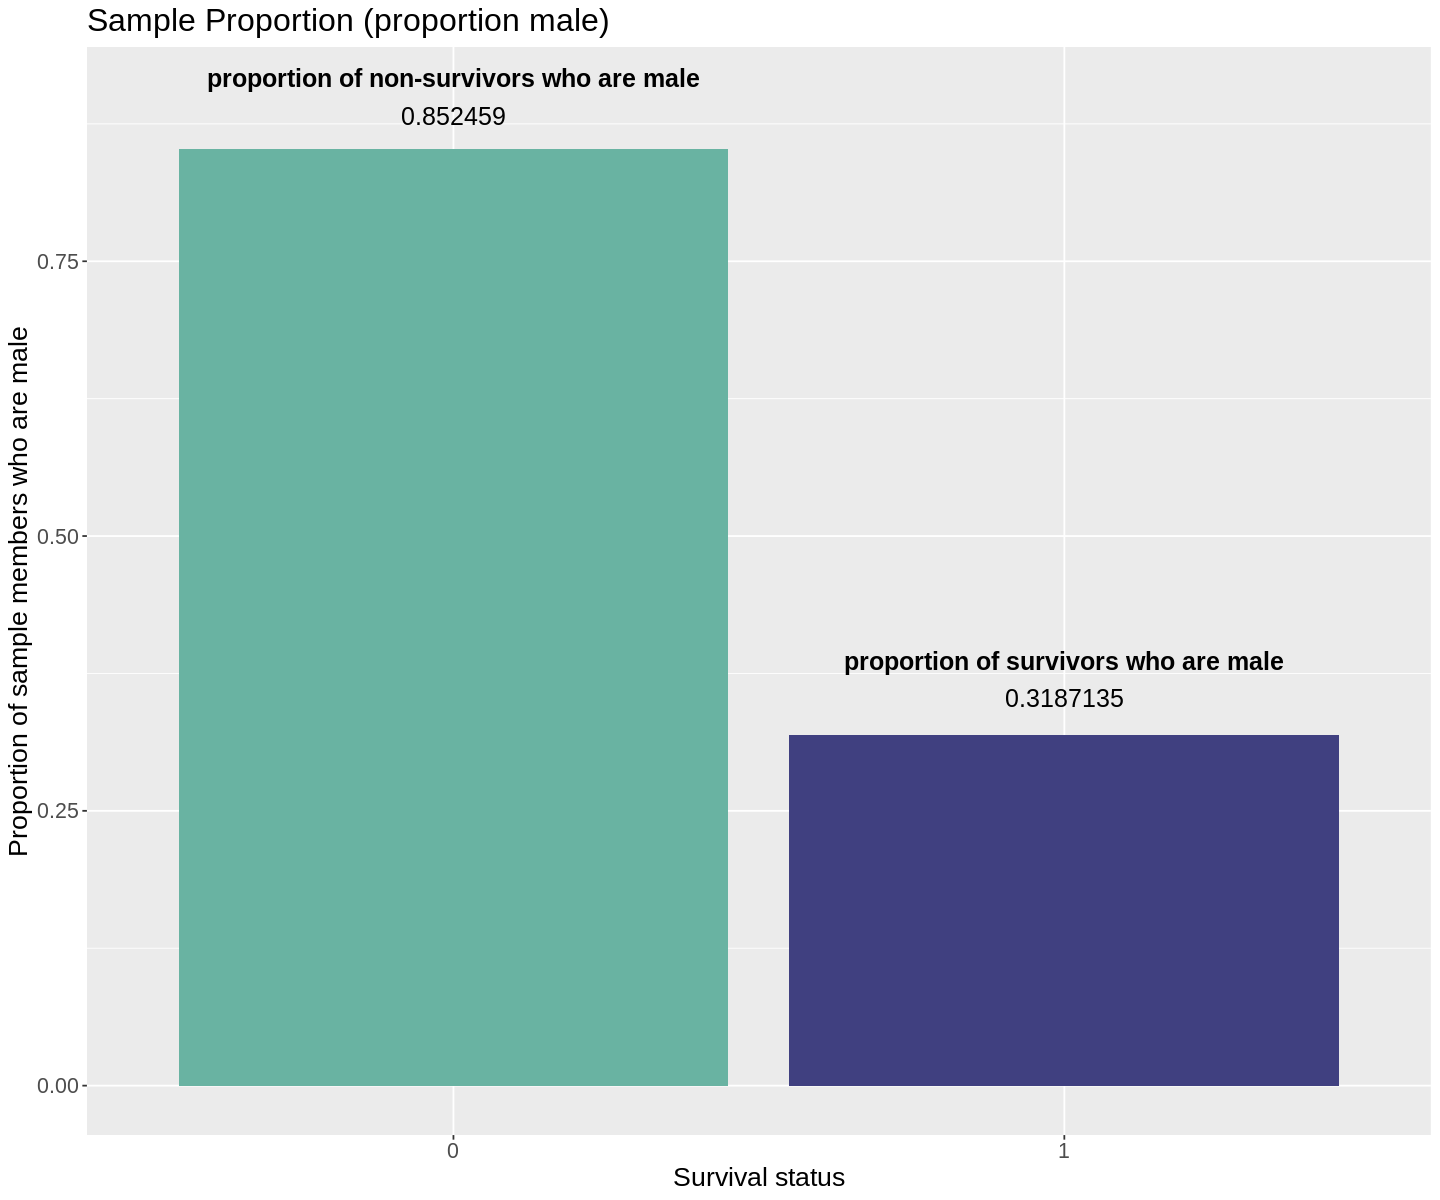

In [19]:
#Format plot width and height
options(repr.plot.width = 12, repr.plot.height = 10)

#Calculate porportion of non-survivors that are male 
prop_no_surv_male <- titanic_df %>%
    filter(survived == 0) |>
    summarize(n = sum(sex == "male") / n()) |>
    pull()

#Calculate porportion of survivors that are male
prop_surv_male <- titanic_df %>%
    filter(survived == 1) |>
    summarize(n = sum(sex == "male") / n()) |>
    pull()

#Plot bar graph to show porportions
titanic_df |>
    select(survived, sex) |>
    group_by(survived) |>
    summarize(prop_male = sum(sex == "male") / n()) |>
        ggplot(aes(x = survived, y = prop_male, fill = survived)) +
        geom_bar(stat = "identity") +
        annotate("text", 1, 0.9, label = paste('atop(bold("proportion of non-survivors who are male")', ',', prop_no_surv_male, ')'), size = 15/.pt, parse=TRUE) +
        annotate("text", 2, 0.37, label = paste('atop(bold("proportion of survivors who are male")', ',', prop_surv_male, ')'), size = 15/.pt, parse=TRUE) +
        scale_fill_manual(values=c("#69b3a2", "#404080")) +
        theme(legend.position = "none") +
        labs(x = "Survival status", fill = "Sample", y = "Proportion of sample members who are male", title = "Sample Proportion (proportion male)") + 
        theme(text = element_text(size=16))

Figure 3: Bar graph showing proportions of male survivors vs non-survivors.
<br></br>

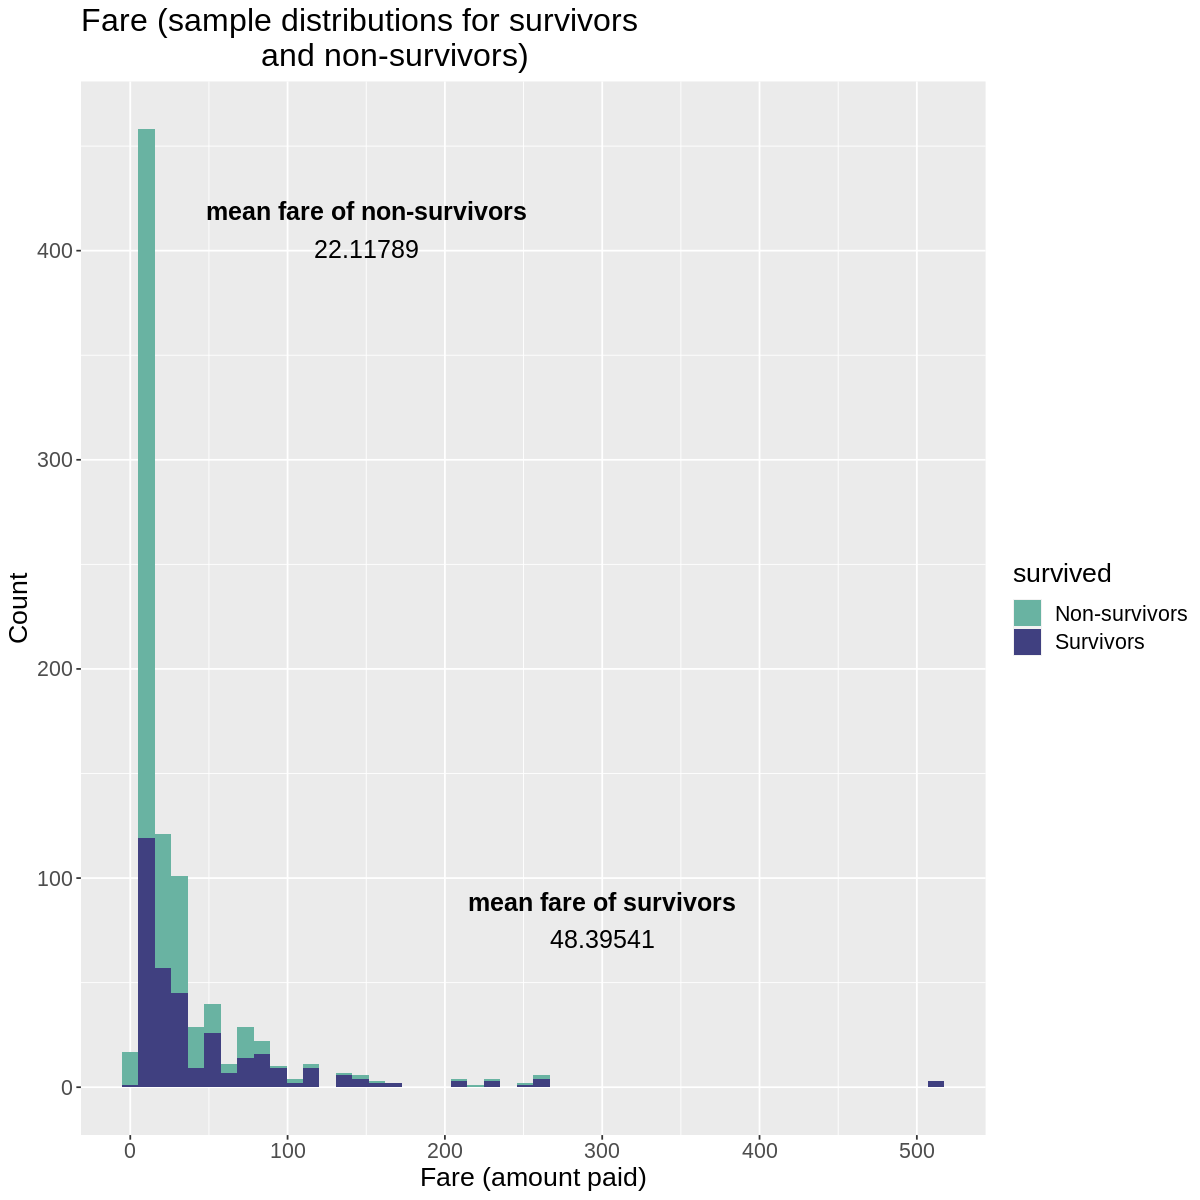

In [6]:
#Format plot width and height
options(repr.plot.width = 10, repr.plot.height = 10)

#Calculating mean ticket cost of non-survivors
mean_fare_non_surv <- titanic_df |>
    filter(survived == 0) |>
    summarize(mean = mean(fare))

#Calculating mean ticket cost of survivors
mean_fare_surv <- titanic_df |>
    filter(survived == 1) |>
    summarize(mean = mean(fare))

#Plot distribution of passenger ticket costs
titanic_df |>
    select(survived, fare) |> 
    drop_na() |>
    ggplot() +
    geom_histogram(aes(x = fare, fill = survived), bins=50) +
    annotate("text", 150, 410, label = paste('atop(bold("mean fare of non-survivors")', ',', 
                                             mean_fare_non_surv, ')'), size = 15/.pt, parse=TRUE) +
    annotate("text", 300, 80, label = paste('atop(bold("mean fare of survivors")', ',', mean_fare_surv, ')'), 
             size = 15/.pt, parse=TRUE) +
    labs(legend=c("h", "b")) +
    scale_fill_manual(values=c("#69b3a2", "#404080"), labels=c("Non-survivors", "Survivors")) +
    labs(x = "Fare (amount paid)", y = "Count", title="Fare (sample distributions for survivors 
                    and non-survivors)") +
    theme(text = element_text(size=16))

Figure 4: Sample distribution of fare paid by passengers.
<br> </br>

In [20]:
tibble(proportion_survivors_male = c(prop_surv_male), proportion_non_survivors_male = c(prop_no_surv_male));

proportion_survivors_male,proportion_non_survivors_male
<dbl>,<dbl>
0.3187135,0.852459


Figure 5: Tibble showing proportion of male survivors vs non-survivors.
<br> </br>

In [21]:
tibble(mean_fare_survivors = c(mean_fare_surv), mean_fare_non_survivors = c(mean_fare_non_surv))

mean_fare_survivors,mean_fare_non_survivors
<named list>,<named list>
48.39541,22.11789


Figure 6: Tibble showing the mean amount fare paid by survivors vs non-survivors.

<br>

The figures above at least suggest that survivors and non-survivors may vary when it comes to their fare paid and gender. These findings make some sense: the classic phrase "women and children first" <a href="https://en.wikipedia.org/wiki/Women_and_children_first">(Wikipedia: Birkenhead drill)</a> could explain why a disproportionate number of non-survivors were male. And, it seems plausible that wealthier passengers who bought more tickets may have been able to persuade others to help save them. However, before one can make an inference about all titanic passengers, further analysis is needed. <u>We will accomplish this using 2-sample statistical tests (mean for fare, proportion for sex)</u> to determine how likely it is that the samples are from different distributions. 

<br>

***

<h3> Analysis of Survival Rate Based on Sex (Two-sample Z-test) </h3>

The passenger's sex is one of the intriguing factors in the Titanic dataset. We are looking into whether male and female passengers have different survival rates. The two-sample difference-of-proportions test, sometimes referred to as the two-sample Z-test, will be used to evaluate this hypothesis.

The following hypotheses will be tested:

$$H_0: p_{\text{m}} - p_{\text{f}} = 0$$ $$H_1: p_{\text{m}} - p_{\text{f}} \neq 0$$

using the following test statistic:
$$
T = \frac{p_{\text{m}} - p_{\text{f}}}{\sqrt{ p_{\text{total}} * {1 - p_{\text{total}}} * }
{\sqrt{\frac{1}{n_{\text{m}}}+\frac{1}{n_{\text{f}}}}}}
$$
<br> 
where $p_{\text{m}}$ and $p_{\text{f}}$ are the proportion ratios of the surviors in male and female groups respectively, the $p_{\text{total}}$ is the total number of survivors in the given sample size (irrespective of their gender) and finally $n_{\text{m}}$ and $n_{\text{f}}$ are the sample sizes of male and female groups respectively.

In [26]:
# Calculate the proportion of survivors in both male and female groups 

# The male ratios are already calculated above: prop_surv_male and prop_no_surv_male

# Proportion of females who survived
prop_surv_female <- titanic_df %>%
    filter(survived == 1) |>
    summarize(n = sum(sex == "female") / n()) |>
    pull()

# Proportion of females who did not survived 
prop_no_surv_female <- titanic_df %>%
    filter(survived == 0) |>
    summarize(n = sum(sex == "female") / n()) |>
    pull()

# Proportion of total number of survivors 
prop_total <- sum(titanic_df$survived == 1)/ nrow(titanic_df)

# Total number of passengers that are male
number_male <- sum(titanic_df$sex == "male")

# Total number of passengers that are female
number_female <- sum(titanic_df$sex == "female")

We will use a <b>5%</b> significance level for this hypothesis test.
<br> </br>
Then, we calculate the test statistic using the formula described above, selecting the calculated figures above.

In [9]:
# Calculate test statistic using formula above

gender_test_statistic <- (prop_surv_male - prop_surv_female) / (sqrt((prop_total)*(1 - prop_total)*
                    ((1/number_male) + (1/number_female))))

gender_test_statistic

[1] -10.63134

<br>
Now, we can use the test statistic to obtain the p-value for our hypothesis test. 

In [10]:
# We use 2 * pt() due to the hypothesis test being a two-tailed test.
gender_p_value <- 2 * pt(gender_test_statistic, df = nrow(titanic_df) - 1, lower.tail = TRUE)
gender_p_value

[1] 6.197134e-25

<br> </br>
Since the p-value obtained is less than 0.05, we will reject the null hypothesis at a 5% significance level. Therefore, conclude that there is a statistically significant difference in survival rates between male and female passengers on the Titanic.

This result is in line with historical reports that claim that during the Titanic disaster, women and children were given preference in lifeboat evacuations.

***

<h3> Analysis of Survival Rate Based on Fare Paid (Two sample T-test) </h3>

The preliminary analysis showed there was evidence that people who paid more for their fare had a higher likelihood of surviving. However, since we only have a sample of passenger information in our dataset, we have to make sure this conclusion is not due to variation of fare paid between all passengers in our sample. In this section, we will determine whether the observed difference is statistically significant or not.

The following hypotheses will be tested:

$$H_0: \mu_{\text{Survivor}} - \mu_{\text{Non-survivor}} = 0$$ $$H_1: \mu_{\text{Survivor}} - \mu_{\text{Non-survivor}} \neq 0$$
using the following test statistic:
$$
T = \frac{\bar{x}_{\text{Survivor}} - \bar{x}_{\text{Non-survivor}}}{\sqrt{\frac{s^2_{\text{Survivor}}}{n_1}+\frac{s^2_{\text{Non-survivor}}}{n_2}}}
$$
<br> </br>
where $\bar{x}_{\text{Survivor}}$ and $\bar{x}_{\text{Non-survivor}}$ are the sample means of fare paid for survivors and non-survivors respectively, $s^2_{\text{Survivor}}$ and $s^2_{\text{Non-survivor}}$ are the sample variances of fare paid for survivors and non-survivors respectively, and $n_1$ and $n_2$ are the sample size for survivors and non-survivors respectively. 

We will use a <b>5%</b> significance level for this hypothesis test.
<br> </br>

We first obtain the sample mean, sample variance and sample size for both survivor and non-survivor groups in order to calculate the test statistic.

In [11]:
titanic_fare_df <- titanic_df %>%
    # Select only necessary variables
    select(fare, survived) %>%
    # Group passengers (observations) by whether they survived or not
    group_by(survived) %>%
    # Calculate statistics for each group that are needed for the above formula
    summarise(sample_mean = mean(fare),
              sample_var = var(fare),
              n = n())

titanic_fare_df

survived,sample_mean,sample_var,n
<fct>,<dbl>,<dbl>,<int>
0,22.11789,985.2195,549
1,48.39541,4435.1602,342


Figure 7: Mutated dataframe used to calculate the test statistic.

<br> </br>
Then, we calculate the test statistic using the formula described above, selecting the appropriate figures in the mutated dataframe.

In [12]:
# Calculate test statistic using formula above
fare_test_statistic <- (titanic_fare_df$sample_mean[2] - titanic_fare_df$sample_mean[1]) / sqrt((titanic_fare_df$sample_var[2]/titanic_fare_df$n[2]) + (titanic_fare_df$sample_var[1]/titanic_fare_df$n[1]))

fare_test_statistic

[1] 6.839099

<br> </br>
Now, we can use the test statistic to obtain the p-value for our hypothesis test. 

In [13]:
# We use 2 * pt() due to the hypothesis test being a two-tailed test.
fare_p_value <- 2 * pt(fare_test_statistic, df = nrow(titanic_df) - 1, lower.tail = FALSE)
fare_p_value

[1] 1.480226e-11

<br> </br>
Since the p-value obtained is less than 0.05, we will reject the null hypothesis at a 5% significance level. Therefore, we can conclude that the difference in fare paid between survivors and non-survivors is statistically significant, and that it is not due to sample variation. 

***

<h2> Discussion </h2>

Based on the analysis of the Titanic dataset, it was found that there is a statistically significant difference in the mean fare paid between survivors and non-survivors of the Titanic disaster. The p-value obtained from the two-sample t-test was less than the predetermined significance level of 5%, indicating that the observed difference in mean fare between the two groups was not due to variation of fare paid. The same is observed for the two-sample z-test, indicating that the observed difference in proportion of survivors being biologically male was not due to sample variation. The findings suggests that passengers who were biologically female were more likely to survive the sinking of the Titanic, and passengers who paid higher fares also had a higher likelihood of surviving. These observations were possibly due to many factors that were present at the time of the tragedy, namely, the social norms that were strictly followed by society, the higher class's favourable access to life-saving resources, and their ability to secure information and assistance from others. 

In life-or-death situations, a widespread social norm is that the safety of women and children were to be prioritized. This is in line of historical records and survivor accounts, where women and children were given preference during the Titanic disaster as people were evacuated in lifeboats. The analysis's findings also support this fact, showing that the survival rates of male and female passengers varied statistically significantly. Particularly, the statistics showed that female travellers had significantly higher survival rates than male travellers. 

Socioeconomic status on the Titanic created boundaries between different passenger classes, namely, first, second and third-class. The first and second class cabins were much closer to the boat deck (which contained lifeboats) than the third-class passengers. First and second class cabins were separated by social barriers, while physical gates barred third-class passengers from access to other areas of the ship. This made accessing lifeboats much easier for first and second-class passengers, in a situation where time is of the essence. However, this was not the only type of access that favoured upper class people onboard, as information access was also separated along class lines. Since the first and second class passengers had faster access to lifeboats, they were better able to see the severity of their situation, compared to their lower-class counterparts. They also had more connections to crew members, gaining access to critical information much faster than usual. The findings in our analysis also support this explanation, as we concluded that the difference in fare paid, pertaining to the difference in socioeconomic status, was statistically significant.

Overall, the findings from this analysis provide insights into the factors that may have influenced the survival of passengers on the Titanic, and they highlight the importance of considering multiple variables when analyzing complex datasets. The results of the studies are therefore consistent with what we may have predicted based on historical information and survivor accounts. It is important to keep in mind that the study is limited by the data in the dataset and may not be representative of all passengers aboard the Titanic. 

This project can open doors to further research and inquiries about the factors that impacted the survival of passengers during the tragedy. While this study mainly centered on the variables of sex and fare, there could be other variables present in the dataset that may be crucial in understanding the survival rates, like the age or cabin class. Subsequent projects could explore these variables and their association with survival. Moreover, future research could compare the factors that influenced survival during the Titanic disaster to other similar disasters, such as the sinking of the Lusitania or the Costa Concordia. 

***

<h2> References </h2>

- Bassett, V. (n.d.). Causes and Effects of the Rapid Sinking of the Titanic. Retrieved March 18, 2023, from http://www.writing.engr.psu.edu/uer/bassett.html 
- Leighly, H.P., Bramfitt, B.L. & Lawrence, S.J. RMS Titanic: A metallurgical problem. Practical Failure Analysis 1, 10–13 (2001). Retrieved March 18, 2023, from https://doi.org/10.1007/BF02715155
- College, B. (n.d.). Disproportionate Devastation. Titanic. Retrieved April 13, 2023, from https://courses.bowdoin.edu/history-2203-fall-2020-kmoyniha/reflection/ 